In [1]:
from ReferringRelationships.iterator import RefRelDataIterator
from ReferringRelationships.utils.visualization_utils import get_att_map, objdict, get_dict

import numpy as np
import os
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
annotations_test = json.load(open(os.path.join(os.environ['REL_HOME'], "ReferringRelationships/data/VRD/annotations_test.json")))
test_data_dir = "/data/chami/VRD/10_09_2017/test"
img_dir = "/data/chami/VRD/sg_dataset/sg_test_images/"
vocab_dir = os.path.join(os.environ['REL_HOME'], "ReferringRelationships/data/VRD")
predicate_dict, obj_subj_dict = get_dict(vocab_dir)

In [3]:
model_checkpoint = "/data/chami/ReferringRelationships/models/10_09_2017/5/model26-0.58.h5"
params = objdict(json.load(open(os.path.join(os.path.dirname(model_checkpoint), "args.json"), "r")))
params.nb_conv_move_map = 3
if params.model == 'ssn':
    from ReferringRelationships.ssn import ReferringRelationshipsModel
else:
    from ReferringRelationships.model import ReferringRelationshipsModel
relationships_model = ReferringRelationshipsModel(params)
model = relationships_model.build_model()

In [4]:
model.load_weights(model_checkpoint)
test_generator = RefRelDataIterator(test_data_dir, params)

In [5]:
images = test_generator.images
subj_id = np.zeros((1, 1))
predicate_id = np.zeros((1, 1))
obj_id = np.zeros((1, 1))
image_ids = sorted(list(annotations_test.keys()))

### USER INPUT HERE 

In [14]:
image_index = 10

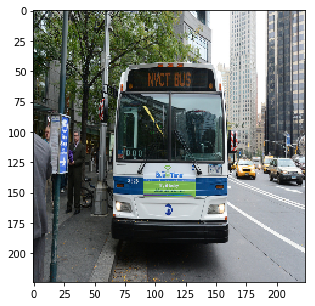

In [15]:
img = cv2.imread(os.path.join(img_dir, image_ids[image_index]))
img = cv2.cvtColor(cv2.resize(img, (params.input_dim, params.input_dim)),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(img)

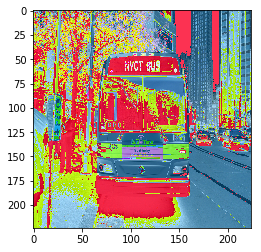

In [17]:
# just to make sure that the image frome dataset.hdf5 is the same
plt.imshow(images[image_index]+124)

### USER INPUT HERE 

In [40]:
subj = "bus"
predicate = "next to"
obj = "building"
relationship = [subj, predicate, obj]

In [41]:
subj_id[0, 0] = obj_subj_dict.index(subj)
predicate_id[0, 0] = predicate_dict.index(predicate)
obj_id[0, 0] = obj_subj_dict.index(obj)

In [42]:
subject_heatmap, object_heatmap = model.predict([images[image_index:image_index+1], subj_id, predicate_id, obj_id])

In [43]:
att_map = get_att_map(img.astype(np.float32), subject_heatmap[0], object_heatmap[0], params.input_dim, relationship)

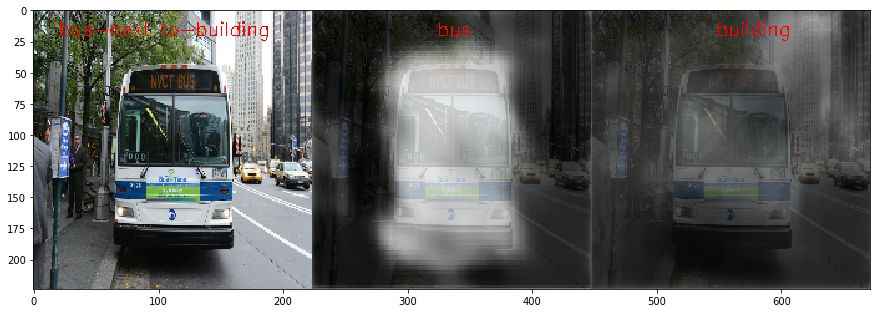

In [44]:
plt.figure(figsize=(15, 15))
plt.imshow(att_map.astype(np.uint8))